<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/2%20Logistic%20Regression/LogisticRegressionWithOpenCVonIRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt

# plt.style.use('ggplot')
iris=datasets.load_iris()         # 载入训练数据集


In [2]:
print (dir(iris))             #字典结构
print (iris.data.shape)       #数据大小和特征
print (iris.feature_names)     #特征
print (iris.target.shape)
print (np.unique(iris.target))    #标签

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150,)
[0 1 2]


In [3]:
# 简化二分类问题   因为仅关注二分类问题，忽略不需要的标签
idx=iris.target !=2     # 得到标签为0和1的数据
data=iris.data[idx].astype(np.float32)
target=iris.target[idx].astype(np.float32)

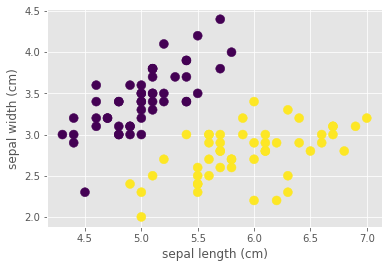

In [8]:
# 检查数据
plt.scatter(data[:,0],data[:,1],c=target,cmap='viridis',s=80)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [5]:
# 把数据分为训练集和测试集
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(data,target,test_size=0.1,random_state=42)   #42 表示随机状态

# 训练分类器
lr=cv2.ml.LogisticRegression_create()   # 创建分类器
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)          # 指定训练方法
lr.setMiniBatchSize(1)                                           # 使用每个数据的之后都更新一次模型
lr.setIterations(100)                                            # 算法结束之前的迭代次数
lr.train(X_train,cv2.ml.ROW_SAMPLE,Y_train)                      # 调用对象的训练方法
lr.get_learnt_thetas()                                           # 检索得到的权重　ｘ＝ｗ０ｆ０＋ｗ１ｆ１＋ｗ２ｆ２＋ｗ３ｆ３＋ｗ４ｆ４＋ｗ４　　四个特征ｆ，偏差ｗ４
#　print(lr.get_learnt_thetas())




array([[-0.04090132, -0.01910266, -0.16340332,  0.28743777,  0.11909772]],
      dtype=float32)

In [6]:
# 测试分类器
ret1, y_pred = lr.predict (X_train)
print (metrics.accuracy_score(Y_train,y_pred))      # 训练数据集上的准确度

ret2, Y_pred= lr.predict(X_test)
print (metrics.accuracy_score(Y_test,Y_pred))        # 测试集上的准确度

1.0
1.0
